In [1]:
# kütüphaneleri import edelim
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# pythonda uyarıları kapatır
import warnings
warnings.filterwarnings("ignore")


In [2]:
# veriyi içe aktar
veri = pd.read_excel('MainData.xlsx')
veri.head()

,Seri,Model,Yıl,Kilometre,Vites Tipi,Yakıt Tipi,Kasa Tipi,Renk,Motor Hacmi,Motor Gücü,Çekiş,Araç Durumu,Ort Yakıt Tüketimi,Yakıt Deposu,Boya-değişen,Kimden,Fiyat
0,3 Serisi,315,1980,175000,Düz,Benzin,Sedan,Mavi (metalik),1598 cc,118 hp,Arkadan İtiş,İkinci El,NaN,NaN,11 boyalı,Galeriden,205000.0
1,3 Serisi,318i Standart,1984,380000,Düz,LPG & Benzin,Sedan,Kırmızı,1766 cc,105 hp,Arkadan İtiş,İkinci El,NaN,55 lt,NaN,Sahibinden,220000.0
2,3 Serisi,316,1985,300000,Düz,LPG & Benzin,Sedan,Siyah,1766 cc,90 hp,Arkadan İtiş,İkinci El,NaN,55 lt,NaN,Sahibinden,169500.0
3,3 Serisi,318i Standart,1985,340000,Düz,LPG & Benzin,Sedan,Beyaz,1766 cc,105 hp,Arkadan İtiş,İkinci El,NaN,NaN,1 boyalı,Sahibinden,200000.0
4,3 Serisi,316,1986,150000,Düz,Benzin,Coupe,Turuncu,1766 cc,90 hp,Arkadan İtiş,İkinci El,NaN,NaN,NaN,Galeriden,1250000.0


In [3]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1622 entries, 0 to 1621
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Seri                1622 non-null   object 
 1   Model               1622 non-null   object 
 2   Yıl                 1622 non-null   int64  
 3   Kilometre           1622 non-null   int64  
 4   Vites Tipi          1622 non-null   object 
 5   Yakıt Tipi          1622 non-null   object 
 6   Kasa Tipi           1621 non-null   object 
 7   Renk                1622 non-null   object 
 8   Motor Hacmi         1605 non-null   object 
 9   Motor Gücü          1607 non-null   object 
 10  Çekiş               1622 non-null   object 
 11  Araç Durumu         1622 non-null   object 
 12  Ort Yakıt Tüketimi  887 non-null    object 
 13  Yakıt Deposu        1319 non-null   object 
 14  Boya-değişen        835 non-null    object 
 15  Kimden              1622 non-null   object 
 16  Fiyat 

In [4]:
# öncelikli olarak histogram grafiğini elde edeceğimiz metodumuzu yazalım.
def plotHistogram(degisken):
    """
        Girdi: Değişken/sütun ismi
        Çıktı: Histogram grafiği
    """
    
    plt.figure()
    plt.hist(veri[degisken], bins = 85, color = "purple")
    plt.xlabel(degisken)
    plt.ylabel("Frekans")
    plt.title("Veri Sıklığı - {}".format(degisken))
    plt.show()

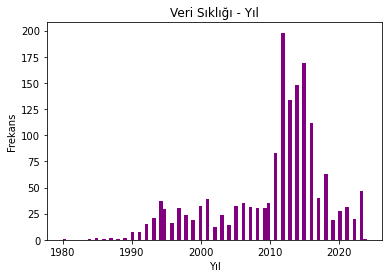

In [5]:
# sayısal değişkenler için histogram çizdirelim
sayisal_degisken = [ "Yıl"]
for i in sayisal_degisken:
    plotHistogram(i)

In [6]:
veri.describe()

,Yıl,Kilometre,Fiyat
count,1622.000000,1622.000000,1.621000e+03
mean,2010.401356,203033.637485,1.117803e+06
std,7.861451,99892.867239,6.255669e+05
min,1980.000000,40.000000,1.000000e+03
25%,2007.000000,130000.000000,6.800000e+05
50%,2013.000000,196000.000000,1.070000e+06
75%,2015.000000,275000.000000,1.365000e+06
max,2024.000000,999999.000000,3.724000e+06


In [7]:
# Columns to be dropped
columns_to_drop = ['Seri', 'Araç Durumu', 'Ort Yakıt Tüketimi', 'Yakıt Deposu', 'Boya-değişen']

# Dropping the specified columns
veri.drop(columns=columns_to_drop, inplace=True)
veri.head()




,Model,Yıl,Kilometre,Vites Tipi,Yakıt Tipi,Kasa Tipi,Renk,Motor Hacmi,Motor Gücü,Çekiş,Kimden,Fiyat
0,315,1980,175000,Düz,Benzin,Sedan,Mavi (metalik),1598 cc,118 hp,Arkadan İtiş,Galeriden,205000.0
1,318i Standart,1984,380000,Düz,LPG & Benzin,Sedan,Kırmızı,1766 cc,105 hp,Arkadan İtiş,Sahibinden,220000.0
2,316,1985,300000,Düz,LPG & Benzin,Sedan,Siyah,1766 cc,90 hp,Arkadan İtiş,Sahibinden,169500.0
3,318i Standart,1985,340000,Düz,LPG & Benzin,Sedan,Beyaz,1766 cc,105 hp,Arkadan İtiş,Sahibinden,200000.0
4,316,1986,150000,Düz,Benzin,Coupe,Turuncu,1766 cc,90 hp,Arkadan İtiş,Galeriden,1250000.0


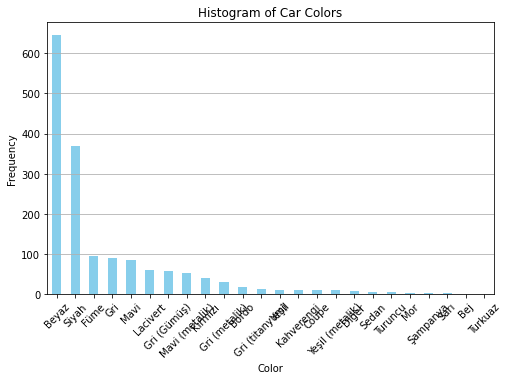

In [8]:


# Plotting a histogram for the 'Renk' column
plt.figure(figsize=(8, 5))
veri['Renk'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Histogram of Car Colors')
plt.xlabel('Color')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.show()


In [9]:
unique_colors = veri['Renk'].unique()
print(list(unique_colors))


['Mavi (metalik)', 'Kırmızı', 'Siyah', 'Beyaz', 'Turuncu', 'Gri', 'Mavi', 'Füme', 'Bej', 'Bordo', 'Diğer', 'Lacivert', 'Coupe', 'Yeşil (metalik)', 'Yeşil', 'Gri (metalik)', 'Mor', 'Gri (Gümüş)', 'Gri (titanyum)', 'Turkuaz', 'Sedan', 'Şampanya', 'Kahverengi', 'Sarı']


In [10]:

import re

# Parantez içindeki metinleri kaldırma
veri['Renk'] = veri['Renk'].apply(lambda x: re.sub(r'\s*\(.*?\)', '', x))

# Belirli renkleri Beyaz olarak güncelleme
veri['Renk'] = veri['Renk'].replace(['Diğer', 'Coupe', 'Sedan'], 'Beyaz')

print(veri['Renk'].unique())


['Mavi' 'Kırmızı' 'Siyah' 'Beyaz' 'Turuncu' 'Gri' 'Füme' 'Bej' 'Bordo'
 'Lacivert' 'Yeşil' 'Mor' 'Turkuaz' 'Şampanya' 'Kahverengi' 'Sarı']


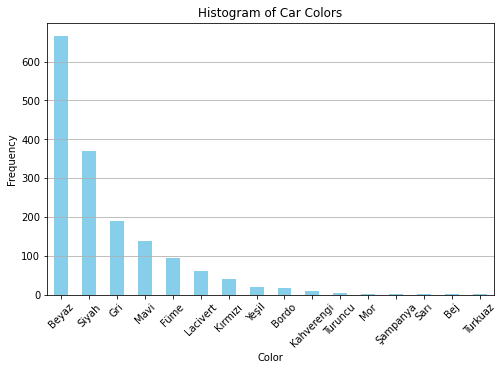

In [11]:

# Plotting a histogram for the 'Renk' column
plt.figure(figsize=(8, 5))
veri['Renk'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Histogram of Car Colors')
plt.xlabel('Color')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.show()


In [12]:

veri['Renk'] = veri['Renk'].replace(['Lacivert', 'Turkuaz'], 'Mavi')
veri['Renk'] = veri['Renk'].replace(['Füme'], 'Gri')
veri['Renk'] = veri['Renk'].replace(['Kırmızı', 'Turuncu', 'Bordo','Şampanya','Yeşil','Mor','Bej','Kahverengi' ,'Sarı'], 'Diğer')

print(veri['Renk'].unique())


['Mavi' 'Diğer' 'Siyah' 'Beyaz' 'Gri']


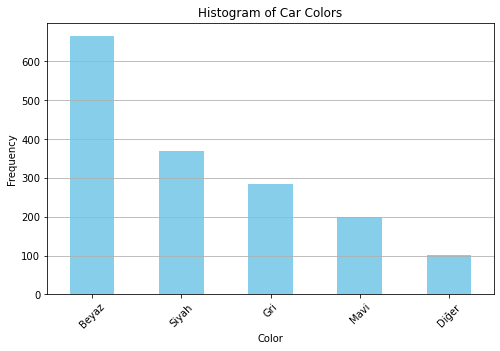

In [13]:

# Plotting a histogram for the 'Renk' column
plt.figure(figsize=(8, 5))
veri['Renk'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Histogram of Car Colors')
plt.xlabel('Color')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.show()

In [14]:
unique_model = veri['Model'].unique()
print(list(unique_model))

['315', '318i Standart', '316', '325i Standart', '325i Cabrio', '324d', '316i Standart', '320i', '325td', '318is', '320i Coupe', '316i Compact', '320i Cabrio', '318tds Standart', '325tds Standart', '318i Touring', '318ti Compact', '328i Standart', '320d Standart', '320Ci', '328Ci', '330d Standart', '320d Touring', '330i Standart', '318Ci', '325Ci', '316ti Compact', '318d Standart', '316Ci', '320d Premium', '320d Comfort', '320i Premium', '320Cd', '316i Premium', '325i Coupe', '335i Standart', '320d M Sport', '320i ', '318d Premium', '320d Advantage', '316i Exclusive', '316i Comfort', '320d Edition Comfort', '316i M Sport', '316i Advantage', '320d xDrive Comfort', '320d Luxury', '320d xDrive M Sport', '316i Luxury Line', '316i Techno Plus', '320d Modern Line', '316i Sport Line', '316i Modern Line', '320d Techno Plus', '320d Sport Line', '328i M Sport', '320d Sport', 'TEST DATA', '320i ED Standart', '320i ED Luxury Line Plus', '320i ED Sport Line', '320i ED Modern Line', '320i ED M Plus'

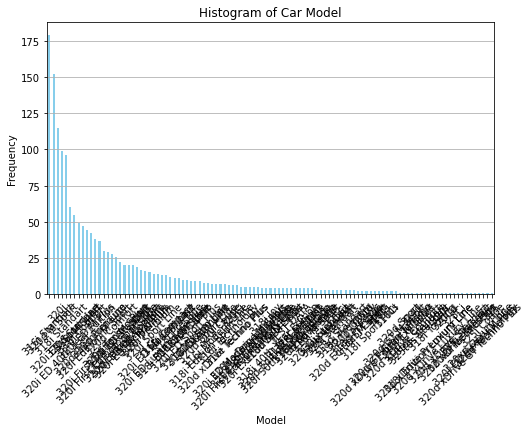

In [15]:

# Plotting a histogram for the 'model' column
plt.figure(figsize=(8, 5))
veri['Model'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Histogram of Car Model')
plt.xlabel('Model')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.show()

In [16]:
veri = veri[veri['Model'] != 'TEST DATA']

In [17]:
unique_model = veri['Model'].unique()
print(list(unique_model))

['315', '318i Standart', '316', '325i Standart', '325i Cabrio', '324d', '316i Standart', '320i', '325td', '318is', '320i Coupe', '316i Compact', '320i Cabrio', '318tds Standart', '325tds Standart', '318i Touring', '318ti Compact', '328i Standart', '320d Standart', '320Ci', '328Ci', '330d Standart', '320d Touring', '330i Standart', '318Ci', '325Ci', '316ti Compact', '318d Standart', '316Ci', '320d Premium', '320d Comfort', '320i Premium', '320Cd', '316i Premium', '325i Coupe', '335i Standart', '320d M Sport', '320i ', '318d Premium', '320d Advantage', '316i Exclusive', '316i Comfort', '320d Edition Comfort', '316i M Sport', '316i Advantage', '320d xDrive Comfort', '320d Luxury', '320d xDrive M Sport', '316i Luxury Line', '316i Techno Plus', '320d Modern Line', '316i Sport Line', '316i Modern Line', '320d Techno Plus', '320d Sport Line', '328i M Sport', '320d Sport', '320i ED Standart', '320i ED Luxury Line Plus', '320i ED Sport Line', '320i ED Modern Line', '320i ED M Plus', '320i ED Te

In [18]:
# Model numaralarının karşılık geldiği sayıları hesaplayalım
model_counts = veri.groupby('Model').size().reset_index(name='Sayısı')

print(model_counts)
print(veri['Model'].nunique())

              Model  Sayısı
0               315       1
1               316       2
2             316Ci       2
3    316i Advantage       4
4      316i Comfort      47
..              ...     ...
101    328i M Sport       4
102   328i Standart       3
103   330d Standart       3
104   330i Standart       3
105   335i Standart       1

[106 rows x 2 columns]
106


In [19]:


# Model sayısını hesaplayalım
model_counts = veri['Model'].value_counts().reset_index()
model_counts.columns = ['Model', 'Sayısı']

# Model sayısı 4'den düşük olanları 'Diğer' ile güncelle
models_to_replace = model_counts[model_counts['Sayısı'] < 4]['Model']
veri['Model'] = veri['Model'].apply(lambda x: 'Diğer' if x in models_to_replace.values else x)

# Benzersiz model isimlerini yazdır
print(veri['Model'].unique())
print(veri['Model'].nunique())

['Diğer' '318i Standart' '325i Standart' '316i Standart' '320i' '318is'
 '320i Coupe' '316i Compact' '320i Cabrio' '318ti Compact' '320d Standart'
 '320Ci' '320d Touring' '316ti Compact' '320d Premium' '320d Comfort'
 '320i Premium' '316i Premium' '320d M Sport' '320d Advantage'
 '316i Comfort' '320d Edition Comfort' '316i M Sport' '316i Advantage'
 '320d xDrive M Sport' '316i Luxury Line' '316i Techno Plus'
 '320d Modern Line' '316i Sport Line' '316i Modern Line'
 '320d Techno Plus' '320d Sport Line' '328i M Sport' '320i ED Standart'
 '320i ED Luxury Line Plus' '320i ED Sport Line' '320i ED Modern Line'
 '320i ED M Plus' '320i ED Techno Plus' '320d xDrive Techno Plus'
 '316i Technology' '320i ED Luxury Line' '320d xDrive Sport Line'
 '320i ED Modern Line Plus' '318i Joy' '320i ED 40th Year Edition'
 '320i ED Sport Plus' '320i Sport Line' '318i Prestige'
 '318i Premium Line' '318d M Plus' '318d Sport Plus'
 '318i Edition Sport Line' '318i 40th Year Edition' '318i Edition M Sport'
 '320

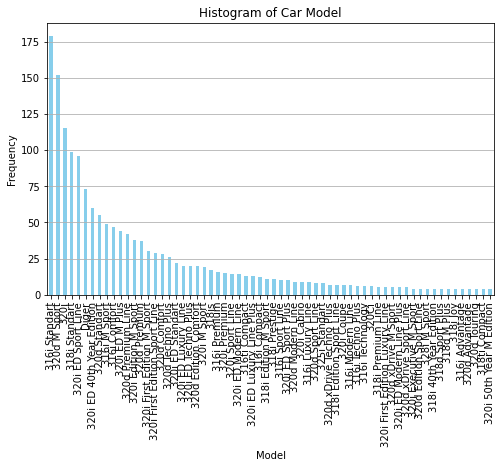

In [20]:
# Plotting a histogram for the 'model' column
plt.figure(figsize=(8, 5))
veri['Model'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Histogram of Car Model')
plt.xlabel('Model')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.grid(axis='y')

# Show the plot
plt.show()

In [21]:
veri.head()

,Model,Yıl,Kilometre,Vites Tipi,Yakıt Tipi,Kasa Tipi,Renk,Motor Hacmi,Motor Gücü,Çekiş,Kimden,Fiyat
0,Diğer,1980,175000,Düz,Benzin,Sedan,Mavi,1598 cc,118 hp,Arkadan İtiş,Galeriden,205000.0
1,318i Standart,1984,380000,Düz,LPG & Benzin,Sedan,Diğer,1766 cc,105 hp,Arkadan İtiş,Sahibinden,220000.0
2,Diğer,1985,300000,Düz,LPG & Benzin,Sedan,Siyah,1766 cc,90 hp,Arkadan İtiş,Sahibinden,169500.0
3,318i Standart,1985,340000,Düz,LPG & Benzin,Sedan,Beyaz,1766 cc,105 hp,Arkadan İtiş,Sahibinden,200000.0
4,Diğer,1986,150000,Düz,Benzin,Coupe,Diğer,1766 cc,90 hp,Arkadan İtiş,Galeriden,1250000.0


In [22]:
veri['Vites Tipi'].nunique()
print(veri['Vites Tipi'].unique())


['Düz' 'Otomatik' 'Yarı Otomatik']


In [23]:
veri['Yakıt Tipi'].nunique()
print(veri['Yakıt Tipi'].unique())

['Benzin' 'LPG & Benzin' 'Dizel']


In [24]:
veri['Kasa Tipi'].nunique()

9

In [25]:
print(veri['Kasa Tipi'].unique())

['Sedan' 'Coupe' 'Cabrio' nan 'Siyah' 'Bordo' 'Hatchback' 'Station wagon'
 'Beyaz' 'Füme']


In [26]:
veri['Kasa Tipi'] = veri['Kasa Tipi'].replace(['Beyaz', 'Füme','Bordo','Siyah'], 'Sedan')
veri['Kasa Tipi'] = veri['Kasa Tipi'].fillna('Sedan')


In [27]:
print(veri['Kasa Tipi'].unique())

['Sedan' 'Coupe' 'Cabrio' 'Hatchback' 'Station wagon']


In [28]:
veri['Çekiş'] = veri['Çekiş'].replace(['Takasa Uygun'], 'Arkadan İtiş')
print(veri['Çekiş'].unique())

['Arkadan İtiş' '4WD (Sürekli)' 'Önden Çekiş']


In [29]:
veri.head()

,Model,Yıl,Kilometre,Vites Tipi,Yakıt Tipi,Kasa Tipi,Renk,Motor Hacmi,Motor Gücü,Çekiş,Kimden,Fiyat
0,Diğer,1980,175000,Düz,Benzin,Sedan,Mavi,1598 cc,118 hp,Arkadan İtiş,Galeriden,205000.0
1,318i Standart,1984,380000,Düz,LPG & Benzin,Sedan,Diğer,1766 cc,105 hp,Arkadan İtiş,Sahibinden,220000.0
2,Diğer,1985,300000,Düz,LPG & Benzin,Sedan,Siyah,1766 cc,90 hp,Arkadan İtiş,Sahibinden,169500.0
3,318i Standart,1985,340000,Düz,LPG & Benzin,Sedan,Beyaz,1766 cc,105 hp,Arkadan İtiş,Sahibinden,200000.0
4,Diğer,1986,150000,Düz,Benzin,Coupe,Diğer,1766 cc,90 hp,Arkadan İtiş,Galeriden,1250000.0


In [30]:
# Motor hacmi ve motor gücü sütunlarından hp ve cc kısımlarını çıkarma
veri['Motor Hacmi'] = veri['Motor Hacmi'].str.replace(' cc', '', regex=False)
veri['Motor Gücü'] = veri['Motor Gücü'].str.replace(' hp', '', regex=False)

# NaN değerleri kontrol etme ve temizleme
veri['Motor Hacmi'] = pd.to_numeric(veri['Motor Hacmi'], errors='coerce')
veri['Motor Gücü'] = pd.to_numeric(veri['Motor Gücü'], errors='coerce')

# NaN değerleri 0 veya başka bir değer ile doldurmak (isteğe bağlı)
veri['Motor Hacmi'] = veri['Motor Hacmi'].fillna(0).astype(int)
veri['Motor Gücü'] = veri['Motor Gücü'].fillna(0).astype(int)

In [31]:
veri.head()

,Model,Yıl,Kilometre,Vites Tipi,Yakıt Tipi,Kasa Tipi,Renk,Motor Hacmi,Motor Gücü,Çekiş,Kimden,Fiyat
0,Diğer,1980,175000,Düz,Benzin,Sedan,Mavi,1598,118,Arkadan İtiş,Galeriden,205000.0
1,318i Standart,1984,380000,Düz,LPG & Benzin,Sedan,Diğer,1766,105,Arkadan İtiş,Sahibinden,220000.0
2,Diğer,1985,300000,Düz,LPG & Benzin,Sedan,Siyah,1766,90,Arkadan İtiş,Sahibinden,169500.0
3,318i Standart,1985,340000,Düz,LPG & Benzin,Sedan,Beyaz,1766,105,Arkadan İtiş,Sahibinden,200000.0
4,Diğer,1986,150000,Düz,Benzin,Coupe,Diğer,1766,90,Arkadan İtiş,Galeriden,1250000.0


In [32]:
# Model ve Yıl bazında ortalama motor hacmi ve gücü hesaplama
mean_values = veri.groupby(['Model', 'Yıl'])[['Motor Hacmi', 'Motor Gücü']].mean().reset_index()

# NaN değerler ile doldurulacak DataFrame
veri_filled = veri.copy()

# Motor hacmi ve motor gücü değerleri 0 olanları ortalama değerlerle doldurma
for index, row in veri_filled[veri_filled[['Motor Hacmi', 'Motor Gücü']].eq(0).any(axis=1)].iterrows():
    model_yil_avg = mean_values[(mean_values['Model'] == row['Model']) & (mean_values['Yıl'] == row['Yıl'])]
    if not model_yil_avg.empty:
        veri_filled.at[index, 'Motor Hacmi'] = model_yil_avg['Motor Hacmi'].values[0]
        veri_filled.at[index, 'Motor Gücü'] = model_yil_avg['Motor Gücü'].values[0]

veri_filled.head()

,Model,Yıl,Kilometre,Vites Tipi,Yakıt Tipi,Kasa Tipi,Renk,Motor Hacmi,Motor Gücü,Çekiş,Kimden,Fiyat
0,Diğer,1980,175000,Düz,Benzin,Sedan,Mavi,1598,118,Arkadan İtiş,Galeriden,205000.0
1,318i Standart,1984,380000,Düz,LPG & Benzin,Sedan,Diğer,1766,105,Arkadan İtiş,Sahibinden,220000.0
2,Diğer,1985,300000,Düz,LPG & Benzin,Sedan,Siyah,1766,90,Arkadan İtiş,Sahibinden,169500.0
3,318i Standart,1985,340000,Düz,LPG & Benzin,Sedan,Beyaz,1766,105,Arkadan İtiş,Sahibinden,200000.0
4,Diğer,1986,150000,Düz,Benzin,Coupe,Diğer,1766,90,Arkadan İtiş,Galeriden,1250000.0


In [33]:
veri_filled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1618 entries, 0 to 1621
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Model        1618 non-null   object 
 1   Yıl          1618 non-null   int64  
 2   Kilometre    1618 non-null   int64  
 3   Vites Tipi   1618 non-null   object 
 4   Yakıt Tipi   1618 non-null   object 
 5   Kasa Tipi    1618 non-null   object 
 6   Renk         1618 non-null   object 
 7   Motor Hacmi  1618 non-null   int32  
 8   Motor Gücü   1618 non-null   int32  
 9   Çekiş        1618 non-null   object 
 10  Kimden       1618 non-null   object 
 11  Fiyat        1618 non-null   float64
dtypes: float64(1), int32(2), int64(2), object(7)
memory usage: 216.2+ KB


In [34]:
# Yılı 2000'den Düşük ve fiyatı 1.000.000'dan büyük olan değerleri filtreleme
filtered_data = veri[(veri_filled['Yıl'] < 2000) & (veri_filled['Fiyat'] > 600000)]
filtered_data.head(50)

,Model,Yıl,Kilometre,Vites Tipi,Yakıt Tipi,Kasa Tipi,Renk,Motor Hacmi,Motor Gücü,Çekiş,Kimden,Fiyat
4,Diğer,1986,150000,Düz,Benzin,Coupe,Diğer,1766,90,Arkadan İtiş,Galeriden,1250000.0
5,325i Standart,1987,142000,Düz,Benzin,Sedan,Beyaz,2750,170,Arkadan İtiş,Galeriden,2050000.0
6,Diğer,1987,175000,Düz,Benzin,Cabrio,Siyah,2494,170,Arkadan İtiş,Sahibinden,2150000.0
15,325i Standart,1990,226000,Düz,Benzin,Sedan,Diğer,2494,192,Arkadan İtiş,Galeriden,690000.0
16,325i Standart,1990,200000,Düz,Benzin,Sedan,Mavi,2494,192,Arkadan İtiş,Galeriden,1000000.0
59,318is,1993,380000,Düz,LPG & Benzin,Sedan,Beyaz,1796,140,Arkadan İtiş,Galeriden,625000.0
93,Diğer,1994,340000,Düz,Benzin,Cabrio,Diğer,2494,192,Arkadan İtiş,Sahibinden,700000.0
94,320i,1994,314666,Düz,Benzin,Coupe,Diğer,1598,150,Arkadan İtiş,Galeriden,795000.0
95,320i Cabrio,1994,364000,Düz,LPG & Benzin,Cabrio,Siyah,1991,156,Arkadan İtiş,Sahibinden,800000.0
96,320i Coupe,1994,222222,Düz,Benzin,Coupe,Mavi,1991,150,Arkadan İtiş,Galeriden,950000.0


In [35]:
veri_filled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1618 entries, 0 to 1621
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Model        1618 non-null   object 
 1   Yıl          1618 non-null   int64  
 2   Kilometre    1618 non-null   int64  
 3   Vites Tipi   1618 non-null   object 
 4   Yakıt Tipi   1618 non-null   object 
 5   Kasa Tipi    1618 non-null   object 
 6   Renk         1618 non-null   object 
 7   Motor Hacmi  1618 non-null   int32  
 8   Motor Gücü   1618 non-null   int32  
 9   Çekiş        1618 non-null   object 
 10  Kimden       1618 non-null   object 
 11  Fiyat        1618 non-null   float64
dtypes: float64(1), int32(2), int64(2), object(7)
memory usage: 216.2+ KB


In [36]:
#verini %1 16 tane istisna değeri çıkarırsam hem modelimim doğruluk değeri artar hem de verimizde çok bir kayıp olmaz
1618*0.01


16.18

In [37]:
# Yılı 2000'den küçük ve fiyatı 600.000'den büyük olan satırları filtreleme
veri_filled = veri_filled[~((veri_filled['Yıl'] < 2000) & (veri_filled['Fiyat'] > 600000))]
veri_filled.head()


,Model,Yıl,Kilometre,Vites Tipi,Yakıt Tipi,Kasa Tipi,Renk,Motor Hacmi,Motor Gücü,Çekiş,Kimden,Fiyat
0,Diğer,1980,175000,Düz,Benzin,Sedan,Mavi,1598,118,Arkadan İtiş,Galeriden,205000.0
1,318i Standart,1984,380000,Düz,LPG & Benzin,Sedan,Diğer,1766,105,Arkadan İtiş,Sahibinden,220000.0
2,Diğer,1985,300000,Düz,LPG & Benzin,Sedan,Siyah,1766,90,Arkadan İtiş,Sahibinden,169500.0
3,318i Standart,1985,340000,Düz,LPG & Benzin,Sedan,Beyaz,1766,105,Arkadan İtiş,Sahibinden,200000.0
7,Diğer,1988,215000,Düz,Dizel,Sedan,Gri,2443,86,Arkadan İtiş,Sahibinden,350000.0


In [38]:
veri_filled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1601 entries, 0 to 1621
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Model        1601 non-null   object 
 1   Yıl          1601 non-null   int64  
 2   Kilometre    1601 non-null   int64  
 3   Vites Tipi   1601 non-null   object 
 4   Yakıt Tipi   1601 non-null   object 
 5   Kasa Tipi    1601 non-null   object 
 6   Renk         1601 non-null   object 
 7   Motor Hacmi  1601 non-null   int32  
 8   Motor Gücü   1601 non-null   int32  
 9   Çekiş        1601 non-null   object 
 10  Kimden       1601 non-null   object 
 11  Fiyat        1601 non-null   float64
dtypes: float64(1), int32(2), int64(2), object(7)
memory usage: 150.1+ KB


<AxesSubplot:xlabel='Fiyat', ylabel='Density'>

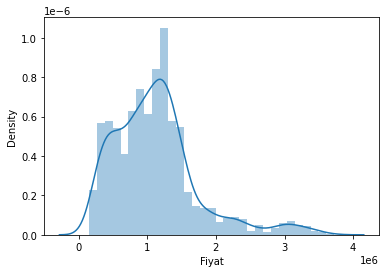

In [39]:
import seaborn as sbn
sbn.distplot(veri_filled['Fiyat'])

<AxesSubplot:xlabel='Yıl', ylabel='count'>

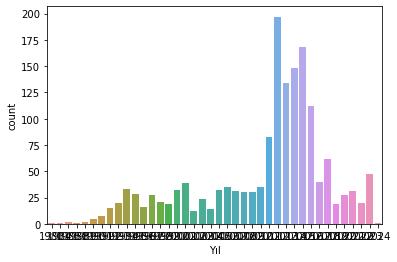

In [40]:
sbn.countplot(veri_filled['Yıl'])

In [41]:
veri_filled.corr()

,Yıl,Kilometre,Motor Hacmi,Motor Gücü,Fiyat
Yıl,1.000000,-0.718047,-0.281245,0.510651,0.829580
Kilometre,-0.718047,1.000000,0.404051,-0.215083,-0.778125
Motor Hacmi,-0.281245,0.404051,1.000000,0.484214,-0.289209
Motor Gücü,0.510651,-0.215083,0.484214,1.000000,0.421444
Fiyat,0.829580,-0.778125,-0.289209,0.421444,1.000000


<AxesSubplot:xlabel='Yıl', ylabel='Fiyat'>

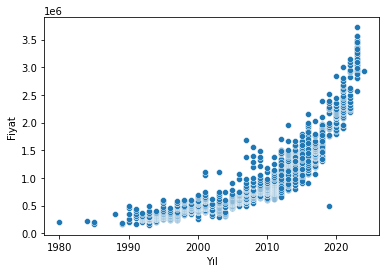

In [42]:
sbn.scatterplot(x="Yıl",y='Fiyat',data=veri_filled)

In [43]:
x=veri_filled[(veri_filled['Yıl']<2020) & (veri_filled['Yıl']>2017)& (veri_filled['Fiyat']<750000)]
x.head()
#bu grafiğe bakarak anarmal fiyata sahip bir arabayı daha tespit etmiş olduk

,Model,Yıl,Kilometre,Vites Tipi,Yakıt Tipi,Kasa Tipi,Renk,Motor Hacmi,Motor Gücü,Çekiş,Kimden,Fiyat
1429,320i,2019,326000,Düz,LPG & Benzin,Sedan,Mavi,1997,184,Arkadan İtiş,Galeriden,485000.0


In [44]:
veri_filled=veri_filled[~((veri_filled['Yıl']<2020) & (veri_filled['Yıl']>2017)& (veri_filled['Fiyat']<750000))]
veri_filled = veri_filled[~((veri_filled['Yıl'] < 2000) & (veri_filled['Fiyat'] > 600000))]


<AxesSubplot:xlabel='Kilometre', ylabel='Fiyat'>

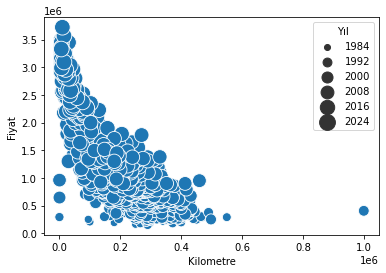

In [45]:
sbn.scatterplot(x="Kilometre",y='Fiyat',size='Yıl',sizes=(15,250),data=veri_filled)

In [46]:
#bu grafiğe bakarak anarmal Kilometreye sahip bir arabayı  tespit etmiş olduk
x=veri_filled[(veri_filled['Kilometre']>800000)] 
x.head()

,Model,Yıl,Kilometre,Vites Tipi,Yakıt Tipi,Kasa Tipi,Renk,Motor Hacmi,Motor Gücü,Çekiş,Kimden,Fiyat
202,320i,1999,999999,Otomatik,LPG & Benzin,Sedan,Siyah,1991,150,Arkadan İtiş,Sahibinden,405000.0


In [47]:
veri_filled=veri_filled[~(veri_filled['Kilometre']>800000)] 

In [48]:
veri_filled.groupby('Yıl').mean()['Fiyat']

Yıl
1980    2.050000e+05
1984    2.200000e+05
1985    1.847500e+05
1988    3.500000e+05
1989    1.750000e+05
1990    3.499998e+05
1991    3.215714e+05
1992    2.836500e+05
1993    2.882500e+05
1994    3.092753e+05
1995    3.499107e+05
1996    3.265938e+05
1997    3.878519e+05
1998    4.618929e+05
1999    4.604444e+05
2000    4.879859e+05
2001    5.453256e+05
2002    4.588125e+05
2003    5.318750e+05
2004    4.705325e+05
2005    5.741719e+05
2006    6.596114e+05
2007    7.470967e+05
2008    8.188333e+05
2009    8.715792e+05
2010    8.057543e+05
2011    8.571783e+05
2012    1.020536e+06
2013    1.108165e+06
2014    1.205758e+06
2015    1.324667e+06
2016    1.435331e+06
2017    1.462262e+06
2018    1.686440e+06
2019    2.097556e+06
2020    2.145130e+06
2021    2.358815e+06
2022    2.598270e+06
2023    3.170585e+06
2024    2.925000e+06
Name: Fiyat, dtype: float64

In [49]:
# One-Hot Encoding
veri_encoded = pd.get_dummies(veri_filled, columns=['Vites Tipi', 'Yakıt Tipi', 'Kasa Tipi', 'Renk', 'Çekiş', 'Kimden', 'Model'])
veri_encoded.head()
# Veriyi yeni bir CSV dosyasına yazdır
veri_encoded.to_csv('veri_encoded549.csv', index=False)

In [50]:
veri_encoded.head()

,Yıl,Kilometre,Motor Hacmi,Motor Gücü,Fiyat,Vites Tipi_Düz,Vites Tipi_Otomatik,Vites Tipi_Yarı Otomatik,Yakıt Tipi_Benzin,Yakıt Tipi_Dizel,...,Model_320i Executive M Sport,Model_320i First Edition Luxury Line,Model_320i First Edition M Sport,Model_320i First Edition Sport Line,Model_320i M Sport,Model_320i Premium,Model_320i Sport Line,Model_325i Standart,Model_328i M Sport,Model_Diğer
0,1980,175000,1598,118,205000.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,1984,380000,1766,105,220000.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1985,300000,1766,90,169500.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1985,340000,1766,105,200000.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1988,215000,2443,86,350000.0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [51]:
veri_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1599 entries, 0 to 1621
Data columns (total 90 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Yıl                                   1599 non-null   int64  
 1   Kilometre                             1599 non-null   int64  
 2   Motor Hacmi                           1599 non-null   int32  
 3   Motor Gücü                            1599 non-null   int32  
 4   Fiyat                                 1599 non-null   float64
 5   Vites Tipi_Düz                        1599 non-null   uint8  
 6   Vites Tipi_Otomatik                   1599 non-null   uint8  
 7   Vites Tipi_Yarı Otomatik              1599 non-null   uint8  
 8   Yakıt Tipi_Benzin                     1599 non-null   uint8  
 9   Yakıt Tipi_Dizel                      1599 non-null   uint8  
 10  Yakıt Tipi_LPG & Benzin               1599 non-null   uint8  
 11  Kasa Tipi_Cabrio 